# Global currency lifetime
## (or on probability of USD replacement)

## Introduction

Idea for this analysis emerged from the statement that the currencies used in global economy are replaced periodically. Such statement is usually accompanied with a graph of lifetime of such global currencies, like the one from this "Medium" article:
["On Free Markets For Money"](https://medium.com/galaxy-digital-research/on-free-markets-for-money-d99f80c6dd7f)
Hence, it is interesting to estimate the lifetime of the global currencies and associated probabilities of survival.  

Such statement has many practical applications. One of the relates to the discounting process, where USD overnight FED rate is often referred to the so-called "risk free rate". It is an abstract coming from quantitative finance, that is used to price derivative contracts. Obviously, if there is a risk of USD loosing its top-liquid currency then it should lose its "risk free" label too. 

The memo is laid down in the discussion manner with aim to demonstrate 'lose ends' of the arguments and to stimulate further counter-arguments and developments.  


## Data

First, the data are taken from the plot within the mentioned article, typed in and are plotted for the crosscheck. Few remarks are important though:  

- the definition of the global currency as a 'legal tender' to set notional of international trading contract. ;  
- dates of the start and end of periods are not rigorously re-checked, however, they make some sense:  
    1. Portugese Empire began to expand in ~1450 after the row of Great Discoveries (new sea routes) and establishment of new colonies;
    2. Spanish Empire lagged due to the necessity to liberate Iberian peninsula from Islamic rule. When completed, the Spain conquered Portugal and they formed Iberian Unity. The 1530 is set to the date of crowing of Charles V as an Emperor, who designed '*the empire on which the Sun never sets*';  
    3. The start of 'Dutch period' is set to 1640 after Holland states liberated themselves and '*Vereenigde Oostindische Compagnie*' (VOC) established monopoly over the trade with Japan. Development of sciences and technology, e.g. water pumping, ship-building, globes and maps making, arts and the great ability to negotiate special relationships have added to the significant growth of its trading networks and wealth;  
    4. Second Spanish period (data point 'spanish2') was triggered by pan-European wars (Spain against France-England Union and Russia against Sweden) which lasted till 1720. Despite these evets Spain became top economy with the largest network of colonies;  
    5. At the end of this war France became at the same level as Spain. In fact, during this period French philosophers has ignited and led the 'Age of Enlightment', which later led to the rise of new class and French Revolution and to the industrialization of England. French language became the language of elites due to large trading network and also great contribution of phylosophers, first Encyclopedia and scientists;  
    6. Britain gained its supremacy after the self-destructive French Revolution, subsequent Napoleonic wars and then his defeat at Waterloo. Before that, Britain had prepaired itself going through industrialization, trade and expansion of colonies. Despite the loss of United States, it strengthened its power in every other colonies. This stimulated the development of sciences and making English a global language;  
    7. An American success became possible due to the weakening of European powers going through First World War, development of financial technologies, technological advantage and special relationship with Britain. English language shared with former metropoly did contribute to its further cultural, scientific and technological expansion. The end of First World War and peaceful settlements in Europe and Near East have happened around 1920. They were negotiated mostly with participation of United States of America. At this time, flexible financial system and investment technology powered by stock markets became an important driver of successful economy. Due to decline and weakening of European financial system the American dollar has taken over and started its current period of reign.  
    
Main drawback of this division is that it is purely subjective and is not explained through historic analysis of relative sizes of competing economies. Nevertheless, let's analyse the sample of 7 points: 
$$\{T_i, \Delta T_i\}, i=1...7$$
where $T_i$ is the beginning of a period and $\Delta T_i$ is the length of that period.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, lognorm
from scipy.optimize import curve_fit


In [2]:
# input data. US dollar is still global currency, hence t2=None.
t = dict(greek=(-500, -200), roman=(-100,300), byzantine=(400,800), arab=(600,1000), byzantine2=(1100,1350), 
         floretine=(1250,1530), venetian=(1300,1500), portuguese=(1450,1530), spanish=(1530,1640), dutch=(1640,1720),
         spanish2=(1700, 1800), french=(1720, 1815), british=(1815, 1920), us=(1920,None))
df = pd.DataFrame(t).T
df.columns = ['t1','t2']
df['ddt']=df.t2-df.t1
df['ddt'].us = 100 # replace None for visualisation only.

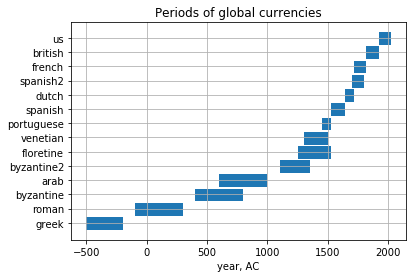

In [3]:
fig, ax = plt.subplots()
labels = []
aticks = []
for it, item in enumerate(df.iterrows()):
     if it>-1:
        ax.broken_barh([[item[1].t1,item[1].ddt],],[it*10,9])
        labels.append(item[0])
        aticks.append(it*10+5)
        
ax.set_xlabel('year, AC')
ax.set_title('Periods of global currencies')

ax.set_yticks(aticks)
lab=ax.set_yticklabels(labels)
ax.grid(True)

# select 'modern times'
df7=df[7:]

## Assumptions

Few assumptions are used.  

**Assumption-1** : Censoring data. Select 'modern times'  

Data before ~1500 ('portuguese') is cut-off. The reason for doing this is two-fold:  

- the regimes of global currency change are visibly different. If *ancient times* are retained, then the two-regimes model has to be invented, which is difficult to validate. The reason of this regime change is the beginning of 'Age of Great Discoveries', where discovery of both Americas by Christopher Columbus suddenly opened the unlimited resourses. This also led to the beginning of social changes through the series of revolutions and the change of economic conditions;  
- too little data is known about alternative ancient monetary systems, like Persia, China or India. For example, in all terms the size of Chinese economy was quite significant even in Roman times. Communication between these economies was near zero.  

An additional argument for this data censoring is that the presented analysis is very simplistic and is based solely on 7 data points. More complex analysis can be valid by inclusion of more data about the status of global economies participated in the inter-states competition at those times.  

**Assumption-2** : Independence of periods  

The periods of global currencies are linked with each other in chain (with some exceptions). This is result of the global competition, where contenders work hard to get on top of the global scene and where the current 'ruling currency' gets weaker due to decay of passionary forces within the states. States rise and fall with regular pattern, just like human beings. This phenomena deserves its own study, however, in this analysis we assume that all 'periods' are independent of each other.  

**Assumption-3** : Same underlying process  

All this analysis if driven by simple facts: two different economies such as Spanish from 16 century and British from 19 century were able to hold global leadership over the same period of time, 110 and 105 years, respectively. The sample of 7 data points range from 80 to 110 years. That's actually an amazing fact. Perhaps, these data points share same dynamics, such as geopolitical competition of economies. In this short memo it is quite impossible to investigate whether it is true or not. 
Therefore, another assumption is that indeed there is same shared underlying process which drives changes of leaders with certain regularity. The discussion about the nature of this process is left outside of this discussion.  

Today, after the period of relative stability the global economy once again experiences drastic changes. As it is mentioned at the beginning these changes are perceived as a possible evidence of another global currency change, from USD to something else like Yuan, SDR (Sovereign Depositary Receipt) or maybe even Bitcoin. However, the 'reigning period' of USD is still on-going. Assuming that the switch is inevitable let's estimate the *switch time* from the available data. The analysis is done assuming few methods.  


## Analysis  

Data analysis is performed with two basic methods:  

- *Polynomial regression model*;
- *Survival analysis* uses estimation of survival process and applies it to the current period. 

As a 'spoiler', due to the nature of used data, the first method appears to be less correct. Information about period proxies lifetime of economy being competitive, which is related to the survival process. The change of the leader is always accompanied with the challenge coming from contenders. It is reflection of two processes: the graduate decline and self-destruction of the leader and the rise of contender due to its ambition and hunger for the power. However, the switch does not happen that easily once the leader becomes weaker than the upcoming contender. Inertia of other countries who use the currency for their international trades has a certain prolongation effect.


### 1. Polynomial regression models 

Regressions with 1st and 2d order polynomials are used:

$$\Delta T(\vec{\alpha},T_i) = \alpha_0 + \alpha_1\cdot T_i + \alpha_2 \cdot T^2_i$$

The objective function is minimized to obtain optimal $\tilde{\vec{\alpha}}$ with equal errors (weights):

$$Q(\tilde{\vec{\alpha}}) = min_{\vec{\alpha}} \sum_{i=0}^N (\Delta T_i- \Delta T(T_i))^2$$ 

We can also assume that errors are normally distributed (in econometric fashion). Hence, the projected distribution of the current lifetime, $\Delta T_{us}$ is:

$$F(\Delta T_{us}) = \frac{1}{\sigma_{us}\sqrt{2\pi}} \int_{-\infty}^{\Delta T_{us}} e^{-\frac{(\tau-\mu_{us})^2}{2\sigma_{us}^2}} d\tau$$

where $\mu_{us} = \Delta T_{us}(\tilde{\vec{\alpha}})$ and $\sigma_{us}^2 = Q(\tilde{\vec{\alpha}})/N$

Note: the constant corresponds to 0th order polynomial and does not involve procedure of minimization.

The results of this model are summarized in plots below. Survival probability is estimated as:

\begin{equation}
SP(1920+\tilde{\Delta T_{us}}) = 1 - F(\tilde{\Delta T_{us}})
\label{eq:sp}
\end{equation}

Table with results is shown at the end.

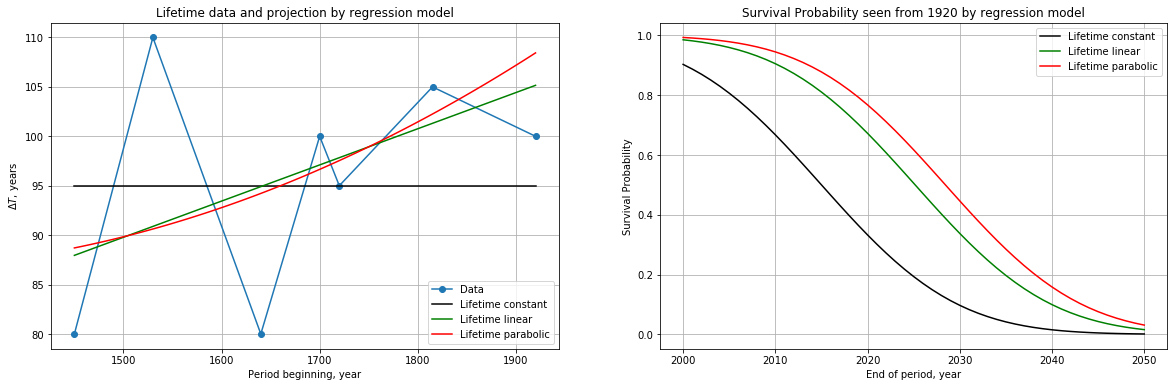

In [4]:
# POLYNOMIALS - METHOD-1

# res will store all results
res=dict()

v_labels = []

fig_w = 20
fig_h = 6
fig,v_ax=plt.subplots(1,2,figsize=(fig_w, fig_h))

# regression plot
ax_reg = v_ax[0]
# SP plot
ax_sp = v_ax[1]

# plot selected data points from df7
df7.plot(x='t1',y='ddt',marker='o', ax=ax_reg)
v_labels.append('Data')

funs = ['constant','linear','parabolic']
v_style = ['-k','-g','-r']

res['poly'] = dict()

# start of US-period
t_us = 1920

for k in [0,1,2]:
#     [:-1] - exclude US point
    p=np.polyfit(df7[:-1]['t1'],df7[:-1]['ddt'],k)
#     Store results of regression = mu and std
    res['poly'][funs[k]] = dict()
    res['poly'][funs[k]]['mu'] = np.polyval(p,t_us)
    res['poly'][funs[k]]['std'] = np.std(np.polyval(p,t_us)-df7[:-1]['ddt'])
#     Plot regression
    x = np.linspace(min(df7.t1),t_us,100)
    ax_reg.plot(x, np.polyval(p,x),v_style[k])
    v_labels.append('Lifetime '+funs[k])
#     Plot sp
    xy = np.linspace(2000,2050,51)
    yy = 1-norm.cdf(xy-1920,res['poly'][funs[k]]['mu'],res['poly'][funs[k]]['std'])
    res['poly'][funs[k]]['sp'] = [xy,yy]
    ax_sp.plot(xy,yy,v_style[k])
#     =========
#     Keep df7 as 'golden copy'
    df_copy = df7.copy()
#     Replace ddt.us with new prediction. May be for later extended analysis
    df_copy['ddt']['us'] = np.polyval(p,t_us)

    
    
#     REGRESSION PLOT
ax_reg.grid()
ax_reg.set_title('Lifetime data and projection by regression model')
ax_reg.set_xlabel('Period beginning, year')
ax_reg.set_ylabel('$\Delta T$, years')
ll=ax_reg.legend(v_labels)

# PDF PLOT
ax_sp.grid()
ax_sp.set_title('Survival Probability seen from 1920 by regression model')
ax_sp.set_xlabel('End of period, year')
_=ax_sp.set_ylabel('Survival Probability')
ll=ax_sp.legend(v_labels[1:])


#### Discussion

As it was mentioned above, the main determinant of the moment of the global currency change is when its strength and trust from others go under some threshold causing switch. So, the dynamics is shaped by interaction of global economic and geopolitical players through their competition. The leader gains its status as the most competitive state in terms of advanced in politics, state governance, economic policies and access to resources (commodity and human), science, technology etc. However, because of its internal processes similar to the ones of living organism, its decline of internal stability is inevitable. Coupled with the existence of global competition, where everyone is competing with everyone by making temporary coalitions, and the pressure from 'younger' contenders, the rotation of leader follows the same pattern with perhaps the same replacement mechanism. 

This interaction dynamics must be understood through the detailed (structured) analysis of all endogenous variables (and may be more), but it also can be analyzed through observation of external variables like we do now. 

This discussion leads to the conclusion that the regression of some threshold values is not good approach. The best alternative is survival (also time-to-hit) analysis. This kind of analysis is widely used in biology, medicine, event history (like this one) and engineering. In finance and economics it is used in insurance, credits and trading etc.

### 2. Survival analysis

In this analysis we aggregate all data into survival probability, $\textit{SP}(\Delta T_i)$, distribution. To do this we ignore time, $T_i$ and use only $\Delta T_i$. $\textit{SP}$ can be measured in many ways, where the most simple and widely used empirical indicator is Kaplan-Meier estimator adopted to our data, which are sorted in increasing order:

$$\textit{SP}(\Delta t) = \prod_{i : \Delta T_i <= \Delta t} (1-\frac{i}{n}) $$

where $n$ is total statistics of the sample and $i$'s are indexes of all data points satisfying $\Delta T_i <= \Delta t$. 

Empirical $\textit{SP}$ is defined by (1) through cumulative distribution function. Here, instead of estimating the 'mean' and 'std' of the sample we build empirical $\textit{SP}$ and then estimate distribution through optimization procedure. Similar to the previous section, Normal distribution is chosen.

Below, K-M estimator is plotted for each point as $\Delta T_i + 1920$ ("Data") with fitted Normal $\textit{SP}$-function on top ("Model").

In [5]:
v=np.sort(df7[:-1].ddt.values)

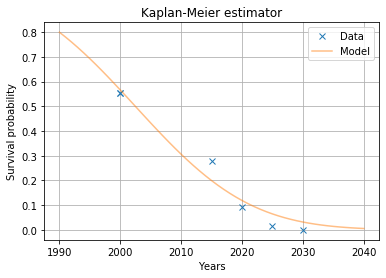

In [6]:
def survt(v,t):
#   Kaplan-Meyer
    n=len(v)
    vs=v<=t
    ns=np.sum(vs)
    nvs=np.cumsum(vs[:ns])
    st=np.prod(1-nvs/n)
    return st


x1, x2 = [70, 120]
x=np.linspace(x1,x2,x2-x1+1)

sv = [survt(v,xx) for xx in x]

# plt.plot(x,sv,'-')
plt.plot(v+1920,[survt(v,xx) for xx in v],'x')

# vc = np.insert(v,0,50)
vc = v

mu1,sigma1 = curve_fit(norm.cdf, vc, [1-survt(vc,xv) for xv in vc], p0=[90,10])[0]

surv_model = lambda x, mu, sigma: 1-norm.cdf(x, mu,sigma)

plt.plot(x+1920, surv_model(x, mu1, sigma1), alpha=.5)

plt.grid()
plt.title('Kaplan-Meier estimator')
plt.xlabel('Years')
plt.ylabel('Survival probability')
# plt.legend(['Step-curve','Data','Model'])
plt.legend(['Data','Model'])

sp100 = surv_model(100, mu1, sigma1)
sp110 = surv_model(110, mu1, sigma1)
sp120 = surv_model(120, mu1, sigma1)

# print(f'MU: {mu1:.2f} {sigma1:.2f}')
# for xv in v:
#     print(f'{xv:4.0f} {survt(v,xv)*100:5.2f}')

Note, that at 80 we have 2 data points ('portuguese' and 'dutch').

**Table**. Summary of expectations of $\mu_{us} = 1920+\Delta T_{us} $, respective s.t.d as $\sigma_{us}$ and Survival Probabilities at 2020, 2030 and 2040. 

| Model | $\mu_{us}$, year | $\sigma_{us}$, year | SP(2020), % | SP(2030), % | SP(2040), % |
|:-------|------:|------:|------:|------:|------:|
| Constant | {{f"{res['poly'][funs[0]]['mu']+1920:.0f}"}}  | {{f"{res['poly'][funs[0]]['std']:.0f}"}} | {{f"{res['poly'][funs[0]]['sp'][1][np.where(res['poly'][funs[0]]['sp'][0]==2021)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[0]]['sp'][1][np.where(res['poly'][funs[0]]['sp'][0]==2031)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[0]]['sp'][1][np.where(res['poly'][funs[0]]['sp'][0]==2040)[0][0]]*100:.1f}"}} |
| Linear | {{f"{res['poly'][funs[1]]['mu']+1920:.0f}"}}  | {{f"{res['poly'][funs[1]]['std']:.1f}"}} | {{f"{res['poly'][funs[1]]['sp'][1][np.where(res['poly'][funs[1]]['sp'][0]==2021)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[1]]['sp'][1][np.where(res['poly'][funs[1]]['sp'][0]==2031)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[1]]['sp'][1][np.where(res['poly'][funs[1]]['sp'][0]==2040)[0][0]]*100:.1f}"}} |
| Parabolic | {{f"{res['poly'][funs[2]]['mu']+1920:.0f}"}}  | {{f"{res['poly'][funs[2]]['std']:.0f}"}} | {{f"{res['poly'][funs[2]]['sp'][1][np.where(res['poly'][funs[2]]['sp'][0]==2021)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[2]]['sp'][1][np.where(res['poly'][funs[2]]['sp'][0]==2031)[0][0]]*100:.1f}"}} | {{f"{res['poly'][funs[2]]['sp'][1][np.where(res['poly'][funs[2]]['sp'][0]==2040)[0][0]]*100:.1f}"}} |
| SP: K-M with Normal | {{ f"{mu1+1920:.0f}"}} | {{ f"{sigma1:.1f}"}} | {{f"{sp100*100:.1f}"}} | {{f"{sp110*100:.1f}"}} | {{f"{sp120*100:.1f}"}} |



## Conclusions

Very few conclusions can be drawn:
- assumption about persistent underlying process of currency switch is weak. More studies are needed.
- input data used in this analysis although make sense but they are not properly validated even on the expert level, which would be interesting to see;
- regression model is not fit for analysis of lifetime data, while survival analysis is more appropriate;
- data points are not many, therefore, the statistical precision of obtained distribution is of course missing;
- Although KM+Normal model expects switch from USD very soon, with high probability even during the next 10 years or so, which means that "the game is not yet over";
